# Classificação de Texto

Exemplo de classificação de texto com pipeline de NLP e classificador no final

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
# Tokenização
def tokenize(text):
    # Tokenização
    tokens = nltk.word_tokenize(text)
    
    # Stemização
    stems  = []
    for item in tokens:
        stems.append(SnowballStemmer("portuguese").stem(item))
    return stems

In [5]:
df = pd.read_csv('articles.csv')

# Dataset
df.head(10)

,title,category
0,"Em teste, WhatsApp Business permite que empres...",tec
1,Por que é mais difícil para as mulheres lutar ...,equilibrioesaude
2,Compare as mensalidades de 1.104 escolas priva...,educacao
3,"Em série sobre Revolução Russa, Mika Lins lê t...",tv
4,Programa espacial soviético teve ideal social ...,ciencia
5,Pesquisadores e estudantes marcham na Paulista...,ciencia
6,"Educar aluno não é apenas ensinar conteúdo, di...",educacao
7,Livro conta os 'fracassos' de cientistas que c...,ciencia
8,Evento da Folha discute crise no financiamento...,ciencia
9,Cientista modifica forma de bactérias para com...,equilibrioesaude


In [6]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(df[['title']], df.category, random_state=42)
X_train.shape

(8302, 1)

In [7]:
# Stop Words
stop_words = nltk.corpus.stopwords.words('portuguese')

# NLP Pipeline
text_clf   = Pipeline([
                # Vectorize
                ('vect',  TfidfVectorizer(tokenizer=tokenize, 
                                          stop_words=stop_words, 
                                          ngram_range=(1,1))),
                # Classificador
                ('clf',   KNeighborsClassifier(n_jobs=-1)),
            ])

# Train
text_clf = text_clf.fit(X_train.title, y_train)

In [8]:
# Evaluate
text_clf.score(X_test.title, y_test)

0.7066473988439307

In [9]:
predictions = text_clf.predict(X_test.title)

conf_matrix = confusion_matrix(y_test, predictions)

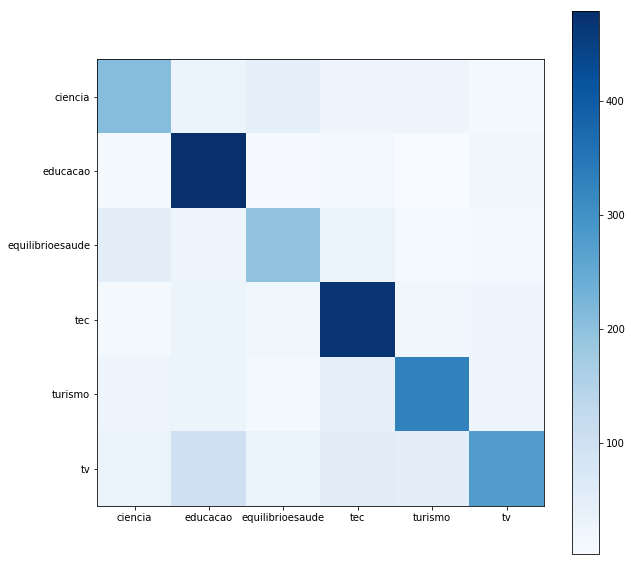

In [10]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(text_clf.classes_)),text_clf.classes_)
plt.yticks(np.arange(len(text_clf.classes_)),text_clf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [11]:
# Predict

text = "Filme 'Star Wars: Os Últimos Jedi'"

text_clf.predict([text])

array(['turismo'], dtype=object)